In [8]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt

# Optimization
find the value of x such that the value f(x) is minimized called **"argmin_x f(x)"**
<br>
f(x) -> value f(x) that minimize f(x)


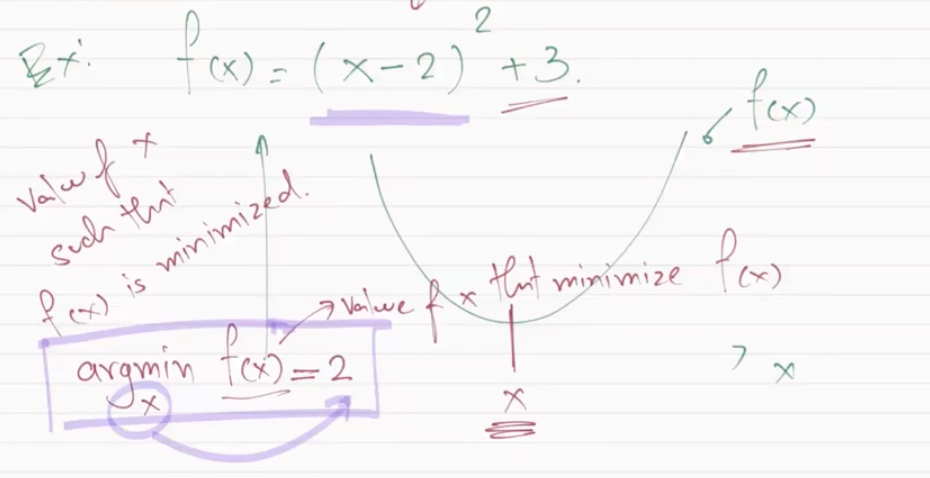

minf(x) = 3 <- value of f(x)

if we want to solve this: **sin(x)=x**, we turn this equation to **argmin f(x) = argmin sin(x)=x**<p>
$argmin$ $sin(x)-x = 0$<br>
    we square f(x) to make it positive<br>
    $(sin(x)-x)^2$<br>
    f(x) will minimize when $sin(x)$ == $x$

# Linear Regression
## (last time)
- find the lim that "fit" the point
- $argmin_{m,c}\sum_{i}(,x^{(1)}+c-y^{(i)})^2$ we use partial derivative
# Gaussian Elimination
Ax=b<br>
turn this into optimization:<br>
$argmin_{\bar x}||A\bar x-b\bar||^2$<p>
    Ax = guess

### 1D problem
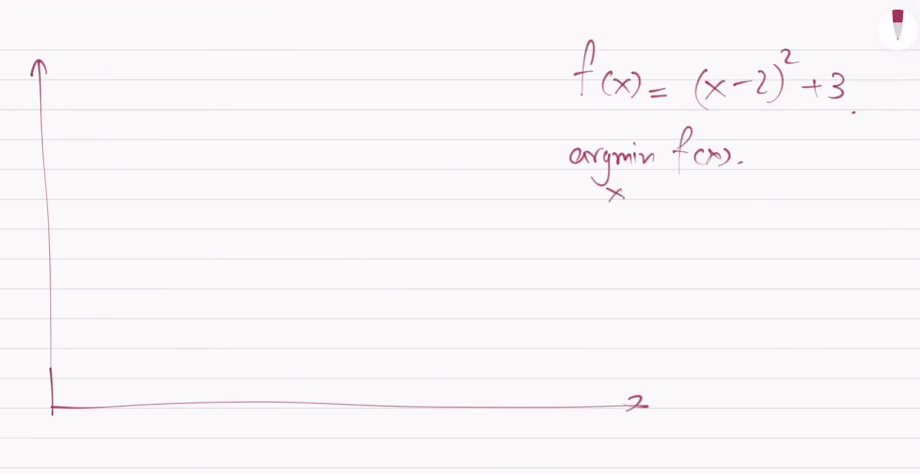
evaluate the function

finding local minimum<br>
if slope is negative -> go to right -> more x<br>
if slope is positve -> go to left -> less x<br>

similar to Newton's method<br>
$x_{n+1}=x_n+\frac{-f'(x)}{|f'(x)|}$<br>
$\frac{-f'(x)}{|f'(x)|}$ -> give the sign of f'(x)

## 1D Gradient Descent

1) Let us consider the function
$$ f(x) = (x-2)^2 + 1 $$
First plot it.

2) If we start at $x=4$, which way should we move and why?

**Ans** start at x=4 it tells us the slope is positive so we move to the left side to guess the next point by shift 1.1 steps from current one

3)If the step size is constants = 1.1, what does the update rule look like?

$$x_{n+1} = \ldots$$

4)Let try it with step size = 1.1. For 10 iteration. Print and plot your point as you go. Can you understand the behavior?

[4.  2.9 1.8 2.9 1.8 2.9 1.8 2.9 1.8 2.9 1.8] [5.   1.81 1.04 1.81 1.04 1.81 1.04 1.81 1.04 1.81 1.04]


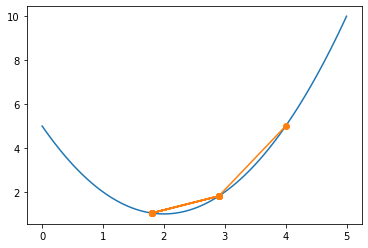

In [9]:
def optimize(f,fp,x0,step_size,n):
    guess = x0
    guesses = [guess]
    for i in range(n):
        guess = guess - fp(guess)/abs(fp(guess))*step_size
        guesses.append(guess)
    return guess,np.array(guesses)

def f(x):
    return (x-2)**2+1

def fp(x):
    return 2*(x-2)

xs = np.linspace(0,5,100)
ys = f(xs)
plt.plot(xs,ys)

x,guesses= optimize(f,fp,x0=4,step_size=1.1,n=10)
plt.plot(guesses,f(guesses),'o-')
print(guesses,f(guesses))

reduce step size to get more accurated answer

5)Now let's try step size=0.01 for 100 iteration. Print and plot your point as you go. Can you understand the behavior?

array([4.  , 3.99, 3.98, 3.97, 3.96, 3.95, 3.94, 3.93, 3.92, 3.91, 3.9 ,
       3.89, 3.88, 3.87, 3.86, 3.85, 3.84, 3.83, 3.82, 3.81, 3.8 , 3.79,
       3.78, 3.77, 3.76, 3.75, 3.74, 3.73, 3.72, 3.71, 3.7 , 3.69, 3.68,
       3.67, 3.66, 3.65, 3.64, 3.63, 3.62, 3.61, 3.6 , 3.59, 3.58, 3.57,
       3.56, 3.55, 3.54, 3.53, 3.52, 3.51, 3.5 , 3.49, 3.48, 3.47, 3.46,
       3.45, 3.44, 3.43, 3.42, 3.41, 3.4 , 3.39, 3.38, 3.37, 3.36, 3.35,
       3.34, 3.33, 3.32, 3.31, 3.3 , 3.29, 3.28, 3.27, 3.26, 3.25, 3.24,
       3.23, 3.22, 3.21, 3.2 , 3.19, 3.18, 3.17, 3.16, 3.15, 3.14, 3.13,
       3.12, 3.11, 3.1 , 3.09, 3.08, 3.07, 3.06, 3.05, 3.04, 3.03, 3.02,
       3.01, 3.  ])

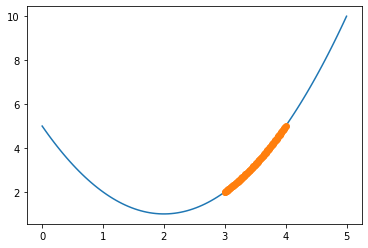

In [8]:
xs = np.linspace(0,5,100)
ys = f(xs)
plt.plot(xs,ys)

x,guesses= optimize(f,fp,x0=4,step_size=0.01,n=100)
plt.plot(guesses,f(guesses),'o-')
guesses

6) When do we want the step size to be small and when do you want the step size to be big?

## Important

In [11]:
# big step size--> fast , not accurate
# small step size--> slow , accurate

## we want accurate and fast

# Big when are far away from solution (slope is big)
# Small when we are closer to the solution (slope is small)

step_size --- propotion to the |slope|
x = x - direction * step_size

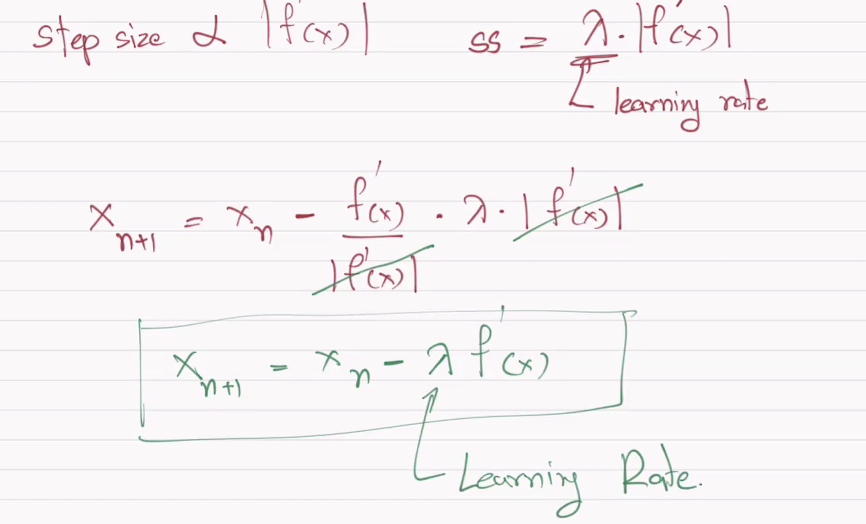
### Gradient Descent
$$x_{n+1}=x_n+\lambda f'(x)$$
popular in ML<br>
Big -> big step<br>
Small -> small step

7) What function kind of does that?

[4.         3.6        3.28       3.024      2.8192     2.65536
 2.524288   2.4194304  2.33554432 2.26843546 2.21474836]


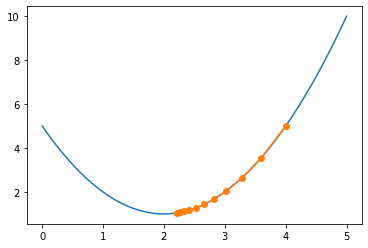

In [12]:
def grad_dsec_ld(fp,x0,learning_rate,n):
    guess = x0
    guesses = [guess]
    for i in range(n):
        guess = guess - fp(guess)*learning_rate
        guesses.append(guess)
    return guess,np.array(guesses)

xs = np.linspace(0,5,100)
ys = f(xs)
plt.plot(xs,ys)

x,guesses = grad_dsec_ld(fp,4,learning_rate=0.1,n=10)
plt.plot(guesses,f(guesses),"o-")
print(guesses)

#Big learning rate --> Big step --> fast & furious(if it works, it's fast)
#Small learning rate --> small step

$f(x_m+h) = f(x_m)+h*f'(x_m)+h^2/2*f''(x_m)$ #f'(x_m)=0<br>
$f(x+h) = f(x_m)+h^2/2f''(x_m)$


$\sum x^4 = ax^5+bx^4+cs^3+dx^2+ex+f$<br>
$=poly$ $of$ $deg5$

8)If we use that function, what does the update rule looks like.

9) Try it with $\lambda=0.1$. Print and Plot to see what happens?

10) Try it with $\lambda = 1.1$. For 4 iterations. Can you see how it goes?

### Multi-Dimension Gradient Descent

1) Let us consider the function.
$$f(x,y) = (x-2)^2 + xy + y^2 + 1$$
Make the 3D plot.

Text(0.5, 0.92, 'f(x,y)')

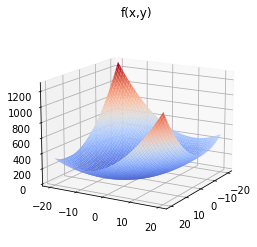

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#see matplotlib3d surface
def f(x,y):
    return (x-2)**2+x*y+y**2+1
nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))
for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]
        
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.gca().view_init(elev=15., azim=30)
ucs = ax.plot_surface(xgrid, ygrid, uz, cmap=cm.coolwarm)
plt.title('f(x,y)')

2) Plot the contour. to find the minimum

Text(0.5, 1.0, 'f(x,y)')

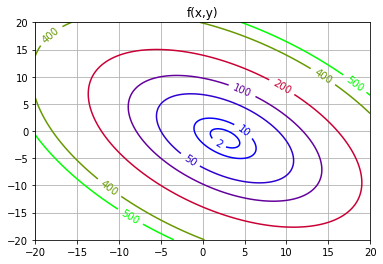

In [14]:
from matplotlib import cm
#see http://matplotlib.org/examples/pylab_examples/contour_demo.html
def f(x,y):
    return (x-2)**2+x*y+y**2+1

nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f(xx,yy) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

## Gradient Descent (n-D) mulitple dimention
$$f(x_n+\Delta x)=f(x_n)+f'(x_n)*\Delta x$$<br>
$f'(x_n)*\Delta x$ <- want to be as negative as possible<br>
taylor's series:
$f(x_n+\Delta x,y_n+\Delta y)=f(x_n,y_n)+(\frac{\partial f}{\partial x} *\Delta x +\frac{\partial f}{\partial y} *\Delta y)$<br>
$\frac{\partial f}{\partial x} *\Delta x$ -> move x alone * how far x move<br>
$\frac{\partial f}{\partial y} *\Delta y$ -> move y alone * how far y move<br>

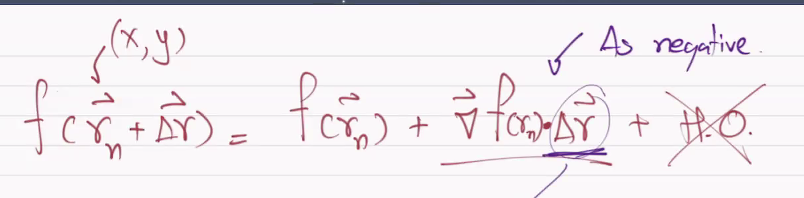
- fixed step size<br>
$$\bar x_{n+1} = \bar x_n-\frac{\bar\nabla f(\bar x_n)}{|\bar \nabla f(\bar x_n)|}*stepsize$$
- dynamic step size
$$\bar x_{n+1} = \bar x_n-\frac{\bar\nabla f(\bar x_n)}{|\bar \nabla f(\bar x_n)|}*\lambda*|\bar\nabla f(\bar x_n)|= \bar x_n - \lambda \bar\nabla f(x_n)$$
### Gradient Descent formula = $\bar x_{n+1} = \bar x_n - \lambda \bar\nabla f(x_n)$<p>
    $\bar\nabla f(x_n)$ <- Gradient[partial derivative]

### Maximization & Minimization
- Maximize -> $argmax_xf(x)=argmin_n-f(x)$
- both called optimization(but we always think that optimization = minimization)

3)Where do you think the minimum is?

4)What is the gradient at (10,-15)? Use plt.arrow to plot arrow.

5) If we want to minimize the function which way should we go? Find the unit vector in that direction.

6) What should your update rule look like? Use vector addition.

[ 2.66666667 -1.33333334]


Text(0.5, 1.0, 'f(x,y)')

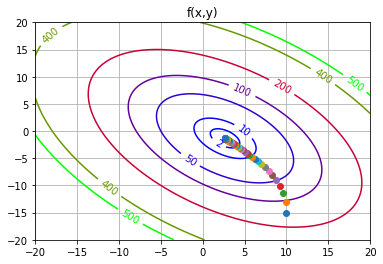

In [15]:
def grad(f, v, h=0.01):
    #[df/dx, df/dy, ...] <- partial derivative
    # df/dx --> (f(v+[h, 0]) - f(v))/h
    # df/dy --> (f(v+[0, h]) - f(v))/h
    n_var = len(v)
    ret = np.zeros(n_var)
    for i in range(n_var):
        dv = np.zeros(n_var)
        dv[i] = h
        diff = (f(v + dv) - f(v - dv))/2/h
        ret[i] = diff
    return ret
    
def f(v):
    x, y = v
    return x**2 + 2*y**2

grad(f, [1.,2.])
    
#powerful formula -Aj.Piti
def grad_desc(f, v0, learning_rate, n):
    v = np.array(v0) # copy and ensure numpy
    vs = [v]
    for i in range(n):
        v = v - learning_rate*grad(f, v)
        vs.append(v)
    return v, vs

def f(v):
    x, y = v
    return (x-2)**2  + x*y + y**2 + 1


v, vs = grad_desc(f, [10., -15.], 0.1, n=200)

print(v) #minimum
#print(vs)
for x, y in vs:
    plt.plot(x, y, 'o')

nx = 200
ny = 200
x = np.linspace(-20,20,nx)
y = np.linspace(-20,20,ny)
xgrid, ygrid = np.meshgrid(x, y)
#print ygrid
uz = np.zeros((nx,ny))

for ix in range(nx):
    for iy in range(ny):
        xx = x[ix]
        yy = y[iy]
        uz[iy,ix] = f([xx,yy]) ##<<<<<<This is not a typo: [iy,ix]

ucs = plt.contour(x, y, uz, [2,10,50,100,200,400,500], cmap=cm.brg)
plt.clabel(ucs, inline=1, fontsize=10)
plt.grid()
plt.title('f(x,y)')

$$f(x,y)=(x-2)^2+xy+y^2+1$$

7) Use what we learn in 1D. How far should we go? What should the update rule really look like?

8) Use $\lambda = 0.1$ and see where the points go

### Maximization & Minimization
- Maximize -> $argmax_xf(x)=argmin_n-f(x)$
- both called optimization(but we always think that optimization = minimization)

### Linear Regression Revisited

Let us consider the problem of findind a line that pass through the points.

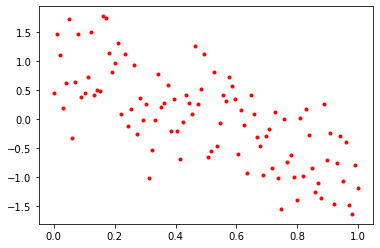

In [16]:
np.random.seed(123)
n = 100
dx = np.linspace(0,1,n)
dy = -2*dx + 1 + np.random.randn(n)/2
plt.plot(dx,dy,'.r')

1) What exactly are we trying to minimize and why?

In [17]:
def f(v):
    m, c = v
    # good line --> near the points --> give me a low value
    # gad line --> far from the point --> give me a high value
    return sum((m*dx + c - dy)**2) # require some thinking # sum ( mx[i] + c -y[i] )**2

2) Minimize and Visualize it.

-1.9859661699936841 1.0065376217420168


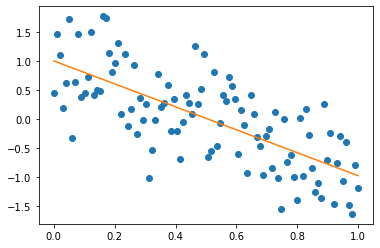

In [18]:
v, _ = grad_desc(f, [0., 1.], learning_rate=0.001, n=10000)
m, c = v
print(m, c) 
xs = np.linspace(0,1, 100)
plt.plot(dx, dy, 'o')
plt.plot(xs, m*xs + c)

real life code:

In [19]:
from scipy.optimize import minimize
res = minimize(f, [0., 1.])
print(res.x)

[-1.98596617  1.00653761]


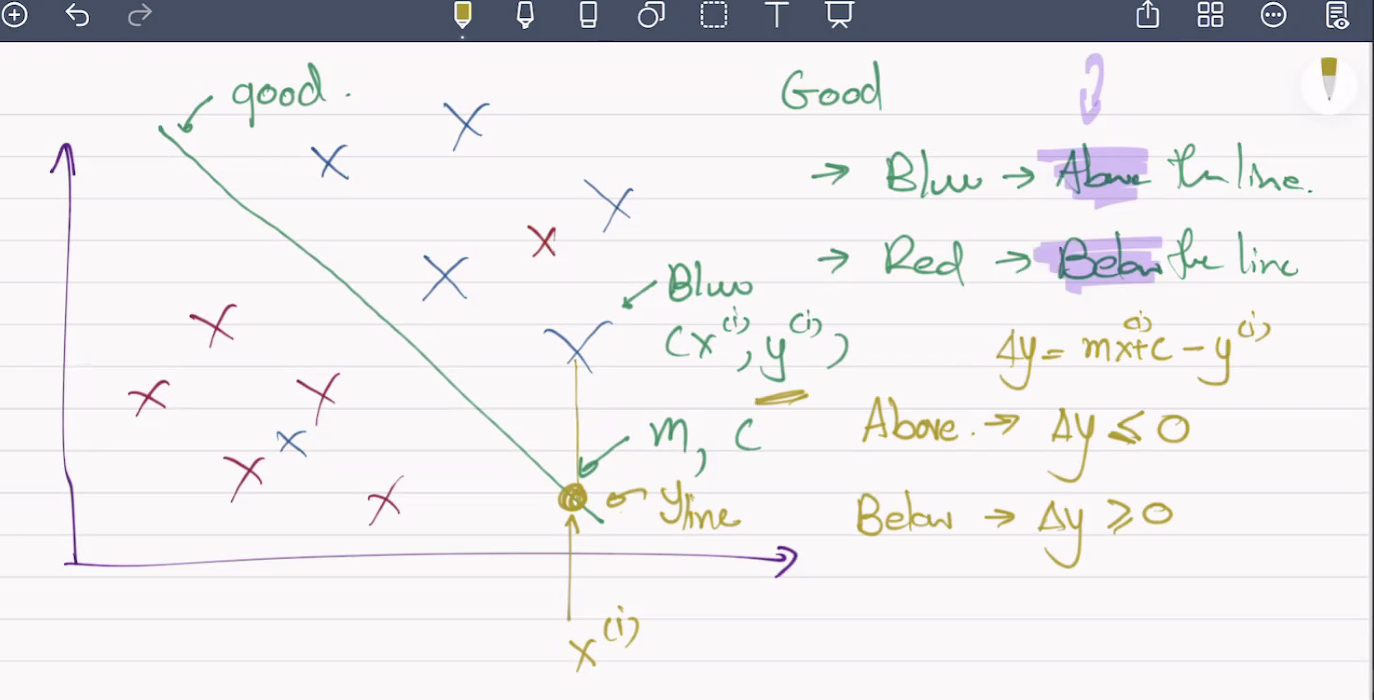

### Separating Line.

We want to draw a separating line betwen two datasets shown below.

In [22]:
np.random.seed(234)
n1 = 100
n2 = 100
mean = [0, 0]
cov = [[1, -0.5], [-0.5, 1]]
r1, r2 = np.random.multivariate_normal(mean, cov, n1).T
#plt.plot(r1, r2, '.r')

mean = [2, 2]
cov = [[1, 0], [0, 1]]
b1, b2 = np.random.multivariate_normal(mean, cov, n2).T
#plt.plot(b1, b2, '.b')

c = np.zeros(n1+n2)
c[:n1] = 1.
c[n1:] = 0.
#print c

d = np.zeros((n1+n2,2))
d[:n1,0] = r1
d[:n1,1] = r2
d[n1:,0] = b1
d[n1:,1] = b2

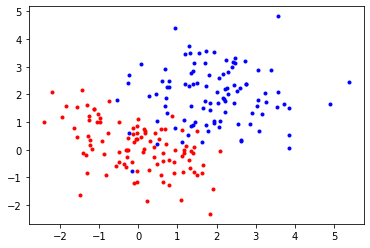

In [23]:
plt.plot(d[c==1,0], d[c==1,1],'.r')#note boolean indexing
plt.plot(d[c==0,0], d[c==0,1],'.b')#note boolean indexing

1) How can we model this as a optimization problem?

In [26]:
def f(v):
    m, b = v # c is used somewhere else
    cost = 0
    for color, (x, y) in zip(c, d):
        blue = color==0
        red = not blue
        dy = m*x + b - y
        above = dy < 0
        below = dy > 0
        if (red and above) or (blue and below):
            cost += abs(dy)
    return cost

res = minimize(f, [0., 1.])

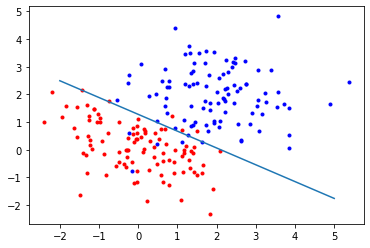

In [27]:
m, b = res.x

plt.plot(d[c==1,0], d[c==1,1],'.r')#note boolean indexing
plt.plot(d[c==0,0], d[c==0,1],'.b')#note boolean indexing

xs = np.linspace(-2, 5, 100)
plt.plot(xs, m*xs + b)